# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

Resposta: A feature que mais se correlaciona ao target, ao meu ver, é a feature *incidenceRate*, pois a mortalidade por câncer está diretamente ligada ao diagnóstico pela doença. A feature *avgDeathsPerYear* também está correlacionada ao target, porém em menor grau que *incidenceRate*.

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [1]:
# importação das principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# leitura da base e análise das primeiras linhas do dataset
df = pd.read_csv('cancer_EUA.csv', sep=';', decimal=",")
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0        890.770529             164.9          489.8    61898.0   
1        173.0        669.088363             161.3          411.6    48127.0   
2        102.0        744.083462             174.7          349.7    49348.0   
3        427.0        953.773339             194.8          430.4    44243.0   
4         57.0        646.194438             144.4          350.1    49955.0   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0    260131.0            11.2   499.748204   (61494.5, 125635]       39.3   
1     43269.0            18.6    23.111234  (48021.6, 51046.4]       33.0   
2     21026.0            14.6    47.560164  (48021.6, 51046.4]       45.0   
3     75882.0            17.1   342.637253    (42724.4, 45201]       42.8   
4     10321.0            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [66]:
# análise da estrutura das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [67]:
# estatísticas do dataset
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [68]:
# estatísticas do target
df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [69]:
# verificação de nulos
nulos = df.isnull().sum()
nulos[nulos > 0]

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64

In [70]:
# percentual de nulos
nulos_pct = nulos/df.shape[0]
nulos_pct[nulos_pct>0.5]

PctSomeCol18_24    0.749918
dtype: float64

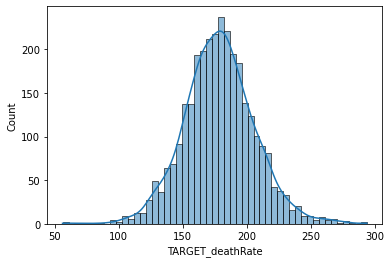

In [71]:
# análise da coluna target
sns.histplot(data=df, x="TARGET_deathRate", kde=True)
plt.show()

In [72]:
# skewness
skew = df['TARGET_deathRate'].skew()
print(f'Skewness: {"%.2f" %skew}')
print('A distribuição possui um desvio sensível para a direita.')

Skewness: 0.13
A distribuição possui um desvio sensível para a direita.


In [73]:
# correlação entre as variáveis
correlacao = df.corr(method='spearman')
correlacao

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000         -0.087692         -0.085583   
avgDeathsPerYear           -0.087692          1.000000          0.672511   
TARGET_deathRate           -0.085583          0.672511          1.000000   
incidenceRate               0.264905          0.274470          0.407906   
medIncome                   0.346061         -0.328660         -0.463858   
popEst2015                  0.810315         -0.043376         -0.044447   
povertyPercent             -0.195880          0.327645          0.442435   
studyPerCap                 0.508170         -0.087545         -0.112687   
MedianAge                  -0.239157         -0.006874          0.008589   
MedianAgeMale              -0.244608         -0.011604         -0.004532   
MedianAgeFemale            -0.258758          0.003867          0.019903   
AvgHouseholdSize            0.118222          0.024783          0.013300   
PercentMarried             -0.172258         -0.184165         -0.257257   
PctNoHS18_24               -0.296569          0.071910          0.124543   
PctHS18_24                 -0.235587          0.197543          0.275896   
PctSomeCol18_24             0.330782         -0.147881         -0.212383   
PctBachDeg18_24             0.381605         -0.184054         -0.270316   
PctHS25_Over               -0.347638          0.277944          0.420579   
PctBachDeg25_Over           0.392733         -0.347502         -0.501730   
PctEmployed16_Over          0.259640         -0.307593         -0.433174   
PctUnemployed16_Over        0.073620          0.284581          0.402940   
PctPrivateCoverage          0.269957         -0.301268         -0.411319   
PctPrivateCoverageAlone     0.327338         -0.265507         -0.380840   
PctEmpPrivCoverage          0.391781         -0.199474         -0.277938   
PctPublicCoverage          -0.250184          0.278845          0.402365   
PctPublicCoverageAlone     -0.153674          0.322418          0.453102   
PctWhite                   -0.182280         -0.093744         -0.101955   
PctBlack                    0.256661          0.196736          0.251542   
PctAsian                    0.561944         -0.151574         -0.207830   
PctOtherRace                0.242279         -0.120319         -0.216924   
PctMarriedHouseholds       -0.118769         -0.193525         -0.279620   
BirthRate                  -0.071837         -0.059738         -0.050487   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.264905   0.346061    0.810315       -0.195880   
avgDeathsPerYear              0.274470  -0.328660   -0.043376        0.327645   
TARGET_deathRate              0.407906  -0.463858   -0.044447        0.442435   
incidenceRate                 1.000000   0.010581    0.186183        0.010033   
medIncome                     0.010581   1.000000    0.309171       -0.884297   
popEst2015                    0.186183   0.309171    1.000000       -0.083300   
povertyPercent                0.010033  -0.884297   -0.083300        1.000000   
studyPerCap                   0.162131   0.257010    0.562972       -0.125192   
MedianAge                     0.016922  -0.115359   -0.408627       -0.149297   
MedianAgeMale                 0.008706  -0.088881   -0.413663       -0.176155   
MedianAgeFemale               0.003489  -0.160013   -0.431936       -0.103869   
AvgHouseholdSize             -0.084246   0.104335    0.295149        0.088690   
PercentMarried               -0.115636   0.375900   -0.322732       -0.598271   
PctNoHS18_24                 -0.142784  -0.322642   -0.306822        0.285646   
PctHS18_24                    0.020066  -0.199432   -0.209124        0.113834   
PctSomeCol18_24               0.018900   0.274998    0.329147       -0.197924   
PctBachDeg18_24               0.103372   0.474073    0.349674       -0.430431   
PctHS25_Over                  0.128990  -0.392909   -0.380

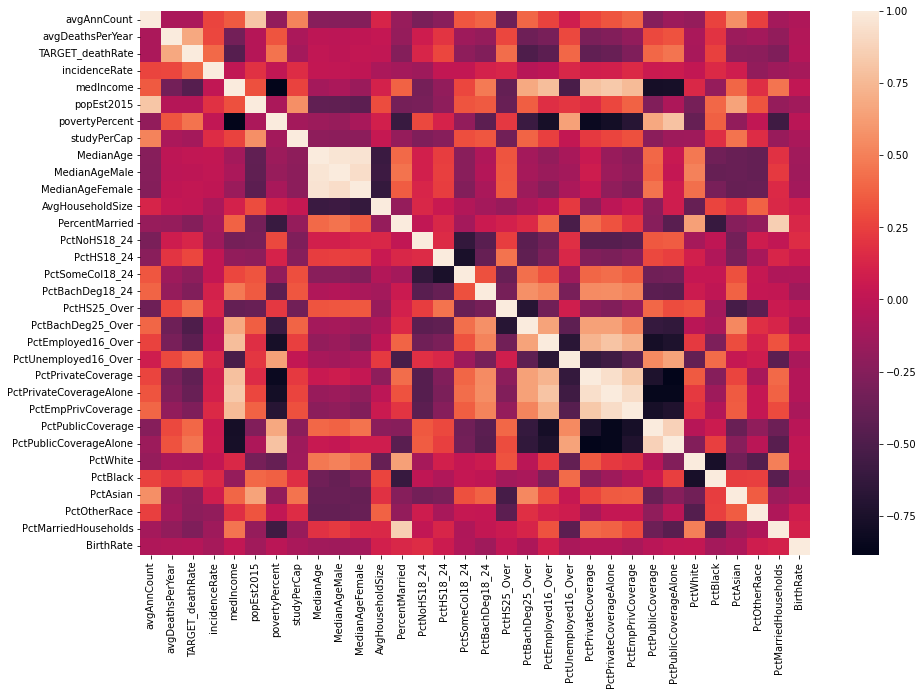

In [75]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlacao)
plt.show()

In [76]:
# variáveis mais correlacionadas com o target
correlacao_target = correlacao['TARGET_deathRate'].abs().sort_values(ascending=False)
correlacao_target[correlacao_target > 0]

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

In [77]:
# identificação da variável mais correlacionada ao target
correlacao_target[correlacao_target > 0.6].index

Index(['TARGET_deathRate', 'avgDeathsPerYear'], dtype='object')

A variável escolhida para análise será *avgDeathsPerYear*.

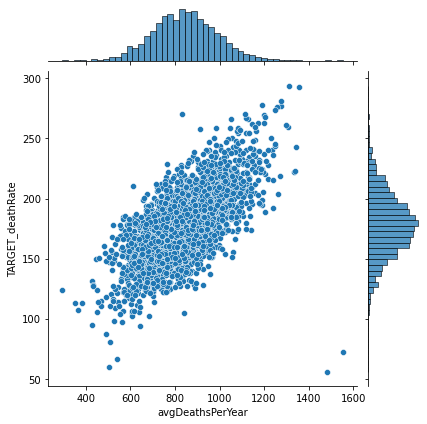

In [78]:
# relação entre a variável avgDeathsPerYear e o target
sns.jointplot(data=df,x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

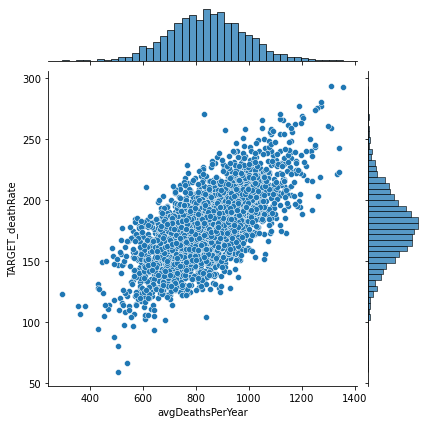

In [79]:
# remoção dos outliers
df = df[~(df['avgDeathsPerYear']>1400)]
sns.jointplot(data=df,x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

Resposta: As variáveis mais relacionadas ao target foram *avgDeathsPerYear*, *PctBachDeg25_Over* e *medIncome*, mas para fins de análise focaremos na variável que apresenta a maior correlação com o target.

---

2. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [80]:
media = np.mean(df['TARGET_deathRate'])
mediana =  np.median(df['TARGET_deathRate'])
std = np.std(df['TARGET_deathRate'])
skew = df['TARGET_deathRate'].skew()

print(f'Média Target: {"%.2f" %media}')
print(f'Mediana Target: {"%.2f" %mediana}')
print(f'Desvio Padrão Target: {"%.2f" %std}')
print(f'Skewness: {"%.2f" %skew}')
print('O target está distribuído com uma sensível assimetria para a direita, uma vez que a média > mediana.')

Média Target: 178.57
Mediana Target: 178.10
Desvio Padrão Target: 27.48
Skewness: 0.17
O target está distribuído com uma sensível assimetria para a direita, uma vez que a média > mediana.


---

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

Resposta: Foi escolhida a feature *avgDeathsPerYear* devido a sua elevada correlação com o target. A feature possuia dois outliers que foram removidos na análise exploratória de dados realizad acima.

---

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

Regressão Linear Simples

In [81]:
# variáveis x e y
x = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

# instanciamento da classe do estimador
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()

# separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(609,) (609,)
(2436,) (2436,)


In [83]:
# treinamento do modelo 
reg_lin.fit(x_train.values.reshape(-1,1),y_train)

# coeficiente e intercepto
print(f'O coeficiente linear é {reg_lin.intercept_}')
print(f'O coeficiente angular é {reg_lin.coef_[0]}')

O coeficiente linear é 62.71553899101859
O coeficiente angular é 0.13732128375775646


Equação modelo final:

$$ y = \mathcal{M} = f_{H, \hat{\vec{b}}}(x) =  62.71 + 0.13 \times \text{avgDeathsPerYear}$$

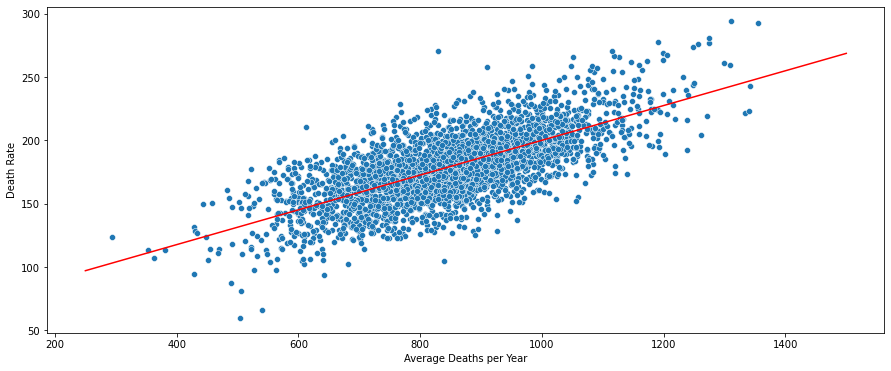

In [84]:
# plot do modelo treinado
plt.figure(figsize=(15, 6))

# scatterplot da feature pelo target
sns.scatterplot(data=df, x=df['avgDeathsPerYear'], y=df['TARGET_deathRate'])

# plot da reta do modelo
x = np.linspace(250, 1500, 10000)
y = reg_lin.intercept_ + reg_lin.coef_[0]*x
plt.plot(x, y, color="red")
plt.xlabel('Average Deaths per Year')
plt.ylabel('Death Rate')
plt.show()

In [85]:
# exemplo de previsão
reg_lin.predict([[500]])

array([131.37618087])

---

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

Resíduo

In [86]:
residuo = y_test - y_pred
residuo.describe()

count    609.000000
mean       0.116635
std       19.536420
min      -70.539109
25%      -13.073168
50%       -0.583214
75%       13.081929
max       61.027283
Name: TARGET_deathRate, dtype: float64

In [87]:
df['TARGET_deathRate'].describe()

count    3045.000000
mean      178.566207
std        27.481759
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

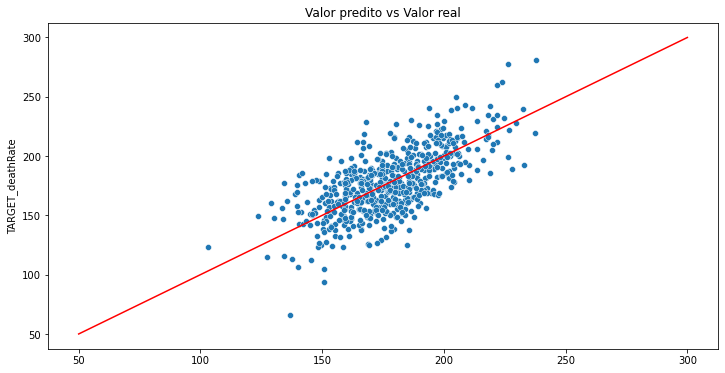

In [88]:
# scatterplot do valor predito pelo valor real
# caso os dois valores fossem iguais, os pontos cairiam em cima da linha vermelha
plt.figure(figsize=(12, 6))
plt.title("Valor predito vs Valor real")
x = np.linspace(50, 300, 400)
y = x
plt.plot(x,y,color='red')

sns.scatterplot(x=y_pred, y=y_test)
plt.show()

In [89]:
# coeficiente de determinação
metrics.r2_score(y_test,y_pred)

0.46799819149288

In [90]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05 #nivel de significancia

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.8323138483830642

p-value: 0.6595767588132286

Falha em rejeitar H_0: amostra parece ser normal


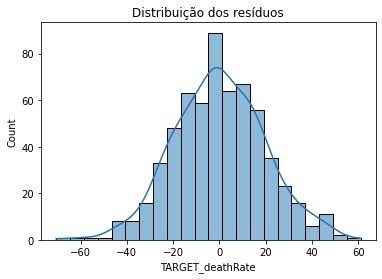

In [91]:
plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

In [92]:
# métricas do modelo
from sklearn import metrics
print('Métricas de Teste - Regressão Linear Simples')
print('R^2:', metrics.r2_score(y_test,y_pred))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', metrics.mean_squared_error(y_test,y_pred,squared=False))

preditos_treino = reg_lin.predict(x_train.values.reshape(-1,1))
print('\nMétricas do Treino - Regressão Linear Simples')
print('R^2:', metrics.r2_score(y_train, preditos_treino))
print('MAE:', metrics.mean_absolute_error(y_train, preditos_treino))
print('MSE:', metrics.mean_squared_error(y_train, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, preditos_treino)))

Métricas de Teste - Regressão Linear Simples
R^2: 0.46799819149288
MAE: 15.434911353896476
MSE: 381.0586034891743
RMSE: 19.520722412072107

Métricas do Treino - Regressão Linear Simples
R^2: 0.495809618927315
MAE: 15.431671903226448
MSE: 385.42030036981447
RMSE: 19.63212419402991


---

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

Regressão Linear Múltipla

In [45]:
# verificação da ocorrência de valores nulos
nulls = df.isnull().sum()
nulls[nulls > 0]

PctSomeCol18_24            2283
PctEmployed16_Over          151
PctPrivateCoverageAlone     609
dtype: int64

In [47]:
# remoção dos valores nulos
# nova verificação de nulos
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')

nulls = df.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [48]:
# criação de X e Y
X = df.drop(columns=['TARGET_deathRate'])
Y = df['TARGET_deathRate']

In [58]:
# etapas da modelagem
from sklearn.linear_model import LinearRegression
reg_mult = LinearRegression()

# treino do modelo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
model = reg_mult.fit(X_train,Y_train)

print(f'O coeficiente linear é: {model.intercept_}')
print(f'Os coeficiente angulares são: {model.coef_}')

O coeficiente linear é: 78.67918579984757
Os coeficiente angulares são: [-8.33234940e-04  8.92949693e-02  1.31111612e-01  1.23092538e-04
  2.23859004e-06  3.05404944e-01 -4.23993620e-04 -2.82786516e-03
 -5.19982795e-01  1.57491118e-01 -6.22216474e-01  5.93588793e-01
 -8.25160211e-02  1.52769143e-01 -9.33749122e-02  2.96724356e-01
 -7.99765058e-01  4.81179595e-01 -5.00599499e-01  2.51544487e-01
  9.58793976e-02 -1.19947456e-01 -4.22518139e-02 -5.60507803e-02
 -2.30410922e-02 -8.16463859e-01 -7.41209452e-01 -4.13002645e-01]


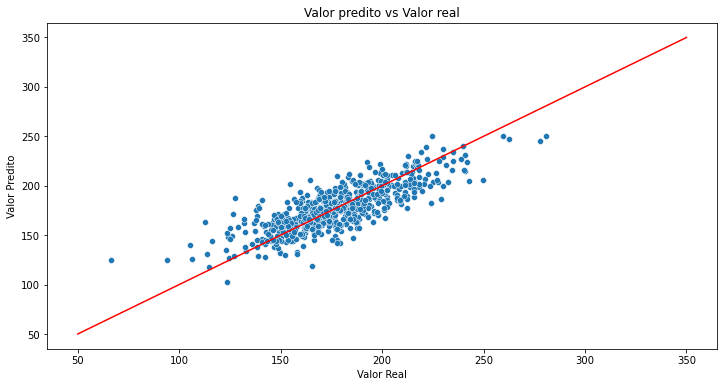

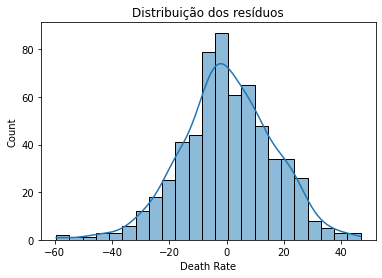

In [55]:
# # scatterplot do valor predito pelo valor real
# distribuição dos resíduos
predicts = model.predict(X_test)
plt.figure(figsize=(12, 6))
x = np.linspace(50, 350, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_test, y=predicts)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valor predito vs Valor real')
plt.show()
print('\n')
plt.title("Distribuição dos resíduos")
sns.histplot(Y_test-predicts, kde=True)
plt.xlabel('Death Rate')
plt.show()

In [93]:
from sklearn import metrics
print('Métricas Teste - Regressão Linear Múltipla')
print('R^2:', metrics.r2_score(Y_test, predicts))
print('MAE:', metrics.mean_absolute_error(Y_test, predicts))
print('MSE:', metrics.mean_squared_error(Y_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicts)))

predicts_train = model.predict(X_train)
print('\nMétricas Treino - Regressão Linear Múltipla')
print('R^2:', metrics.r2_score(Y_train, predicts_train))
print('MAE:', metrics.mean_absolute_error(Y_train, predicts_train))
print('MSE:', metrics.mean_squared_error(Y_train, predicts_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, predicts_train)))

Métricas Teste - Regressão Linear Múltipla
R^2: 0.6400611996862168
MAE: 12.527494676659538
MSE: 257.81449310111395
RMSE: 16.056602788295972

Métricas Treino - Regressão Linear Múltipla
R^2: 0.6756785505802463
MAE: 12.064017359737042
MSE: 247.92236255240024
RMSE: 15.74555056364814


---

Regressão Linear Múltipla Min-Max Scale

In [59]:
# criação de X e Y
X = df.drop(columns=['TARGET_deathRate'])
Y = df['TARGET_deathRate']

In [94]:
# etapas da modelagem
from sklearn.linear_model import LinearRegression
reg_mult = LinearRegression()

# treino do modelo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# aplicação do MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

X_train = mms.fit_transform(X_train)

model = reg_mult.fit(X_train,Y_train)

print(f'O coeficiente linear é {model.intercept_}')
print(f'Os coeficiente angulares são {model.coef_}')

O coeficiente linear é 121.3904054856306
Os coeficiente angulares são [-12.88514511  89.5266617  106.58062923  12.67791598  10.15693297
  13.37673653  -4.13915673  -1.68795271 -21.99527224   6.83511453
  -2.45644842  29.32328637  -5.28927695  11.01465518  -4.83682045
  14.03506204 -31.7506728   13.95420826 -34.4913055   14.18710904
   5.16789953  -5.27768807  -3.76004122  -4.75680684  -0.98199809
 -31.6328688  -35.88017791  -8.80776251]


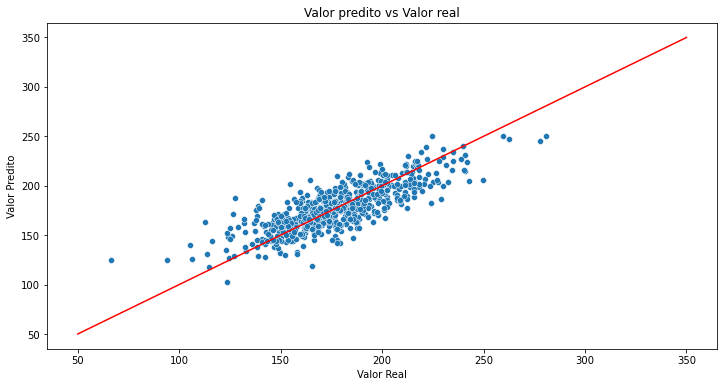

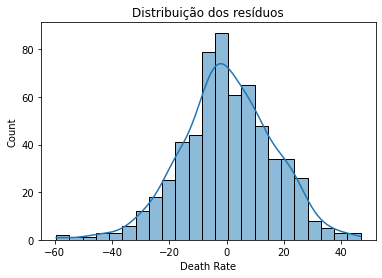

In [95]:
predicts_mms = model.predict(X_test)
plt.figure(figsize=(12, 6))
x = np.linspace(50, 350, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_test, y=predicts)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valor predito vs Valor real')
plt.show()
print('\n')
plt.title("Distribuição dos resíduos")
sns.histplot(Y_test-predicts, kde=True)
plt.xlabel('Death Rate')
plt.show()

In [96]:
from sklearn import metrics
print('Métricas Teste - Regressão Linear Múltipla com MMS')
print('R^2:', metrics.r2_score(Y_test, predicts))
print('MAE:', metrics.mean_absolute_error(Y_test, predicts))
print('MSE:', metrics.mean_squared_error(Y_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicts)))

predicts_train = model.predict(X_train)
print('\nMétricas Treino - Regressão Linear Múltipla com MMS')
print('R^2:', metrics.r2_score(Y_train, predicts_train))
print('MAE:', metrics.mean_absolute_error(Y_train, predicts_train))
print('MSE:', metrics.mean_squared_error(Y_train, predicts_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, predicts_train)))

Métricas Teste - Regressão Linear Múltipla com MMS
R^2: 0.6400611996862168
MAE: 12.527494676659538
MSE: 257.81449310111395
RMSE: 16.056602788295972

Métricas Treino - Regressão Linear Múltipla com MMS
R^2: 0.6756785505802463
MAE: 12.064017359737042
MSE: 247.92236255240024
RMSE: 15.74555056364814


In [98]:
# avaliação os coeficientes com as features na mesma escala
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Valores'])
# analise dos valores absolutos dos coeficientes
coeff_df.abs().sort_values(by='Valores', ascending = False)

Valores
incidenceRate           106.580629
avgDeathsPerYear         89.526662
PctMarriedHouseholds     35.880178
PctPrivateCoverage       34.491305
PctBachDeg25_Over        31.750673
PctOtherRace             31.632869
PercentMarried           29.323286
MedianAgeMale            21.995272
PctEmpPrivCoverage       14.187109
PctHS25_Over             14.035062
PctUnemployed16_Over     13.954208
povertyPercent           13.376737
avgAnnCount              12.885145
medIncome                12.677916
PctHS18_24               11.014655
popEst2015               10.156933
BirthRate                 8.807763
MedianAgeFemale           6.835115
PctNoHS18_24              5.289277
PctPublicCoverageAlone    5.277688
PctPublicCoverage         5.167900
PctBachDeg18_24           4.836820
PctBlack                  4.756807
studyPerCap               4.139157
PctWhite                  3.760041
AvgHouseholdSize          2.456448
MedianAge                 1.687953
PctAsian                  0.981998

Resposta: Ambos modelos de regressão linear múltipla com, e sem, o min-max scaler obtiveram desempenhos indênticos. As features mais relevantes para esses modelos foram *incidenceRate* e *avgDeathsPerYear*

---

5. Compare os três modelos desenvolvidos.

Métricas de Teste - Regressão Linear Simples<br>
R^2: 0.46799819149288<br>
MAE: 15.434911353896476<br>
MSE: 381.0586034891743<br>
RMSE: 19.520722412072107<br>

Métricas Teste - Regressão Linear Múltipla<br>
R^2: 0.6400611996862168<br>
MAE: 12.527494676659538<br>
MSE: 257.81449310111395<br>
RMSE: 16.056602788295972<br>

Métricas Teste - Regressão Linear Múltipla com MMS<br>
R^2: 0.6400611996862168<br>
MAE: 12.527494676659538<br>
MSE: 257.81449310111395<br>
RMSE: 16.056602788295972<br>

Resposta: Analisando as métricas de teste obtidas acima, observamos que o modelo de regressão linear simples foi o modelo que menos se ajustou aos dados, ao passo que os modelos de regressão linear múltipla se ajustou melhor a partir da análise das métricas obtidas.